In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from faker import Faker
import random
import sqlite3

from figure_labeler import *
from IPython.display import HTML
HTML('''
<script
    src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js ">
</script>
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
 } else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit"
    value="Click here to toggle on/off the raw code."></form>
''')

In [2]:
fl = FigureLabeler();
pd.options.mode.chained_assignment = None

<h1 style="text-align:center;">ASND's Coffee Shop: Knowing the Crowd's Favorites for Profitable Perks</h1>
<hr>

<a name="top"></a>
#### Table of Contents:

[ref0]: #exec_summary
- [Executive Summary][ref0]

[ref1]: #prob_stat
- [Problem Statement][ref1]

[ref2]: #motiv
- [Motivation][ref2]

[ref3]: #dat_sor
- [Data Source][ref3]

[ref4]: #dat_prep
- [Data Preprocessing][ref4]

    [ref9]: #panda_dp
    - [Panda's Data Preprocessing][ref9]

    [ref10]: #sql_dp
    - [SQL's Data Preprocessing][ref10]

[ref5]: #dat_expl
- [Data Exploration][ref5]

    [ref11]: #panda_de
    - [Panda's Data Exploration][ref11]

    [ref12]: #sql_de
    - [SQL's Data Exploration][ref12]

[ref6]: #res_dis
- [Results and Discussions][ref6]

[ref7]: #conc
- [Conclusion and Recommendations][ref7]

[ref8]: #refe
- [References][ref8]

***

<a name="exec_summary"></a>
## Executive Summary
This offers a brief overview of findings regarding the most popular order and its associated profitable item, aiming to enhance menu offerings and boost the coffee shop's progress.
***

A group of four individuals, namely ASND, has hired a data scientist to examine data from their newly opened coffee shop. They aim to discover what makes customers happy and what brings in the most money. The data includes details about customer orders, menu items, inventory levels, recipes, and ingredients. By analyzing factors such as order types, popular items, and sales figures, they hope to identify customer favorites and high-earning menu items. This information will guide their decisions regarding menu selection, customer satisfaction strategies, and inventory management. Ultimately, their goal is to ensure customer happiness and increase profitability.

[ref]: #top
[Back to Table of Contents][ref]

<a name="prob_stat"></a>
## Problem Statement
In this section, it aims to understand the underlying factors contributing to the success of a coffee shop by analyzing its sales, inventory, and recipe data.
***
They're focusing on understanding what makes their coffee shop successful by looking at their sales, inventory, and recipe data. By paying attention to things like how people order, which items are popular, and what ingredients they use the most, they want to see what makes customers happy and what helps them make more money. This analysis will not only show them which menu items are the most popular and profitable but will also help them manage their inventory better. With this information, they can improve their menu, make customers happier, and run their coffee shop more smoothly.

[ref]: #top
[Back to Table of Contents][ref]

<a name="motiv"></a>
## Motivation
In this section, the motivation behind the analysis stems from the coffee shop's need to remain competitive in a rapidly evolving market.
***
Their analysis is driven by the need for their coffee shop to stay competitive in a changing market. With customer tastes always changing and lots of other coffee shops out there, they need to understand what keeps customers happy and what helps them make more money. By looking at their sales, inventory, and recipe data, they want to find trends and patterns that can help them make smart choices, like changing their menu, managing their inventory better, and advertising more effectively. Ultimately, they want to use this data to make sure their customers keep coming back and their business keeps growing.

[ref]: #top
[Back to Table of Contents][ref]

<a name="dat_sor"></a>
## Data Source
It describes the dataset containing order information, item popularity, and profitability metrics used to analyze customer preferences and profitability.
***

The "Coffee Shop Data" dataset offers a comprehensive overview of coffee shop operations, covering orders, items, recipes, ingredients, inventory, staff, shifts, and rota. With this dataset, you can analyze total orders, sales, item popularity, hourly patterns, inventory management, and staff performance. It provides valuable insights for optimizing coffee shop operations and is a realistic simulation for data analysis and business optimization.

*Click this for the dataset:* [Dataset Link](https://www.kaggle.com/datasets/viramatv/coffee-shop-data)

[ref]: #top
[Back to Table of Contents][ref]

<a name="dat_prep"></a>
## Data Preprocessing
Discusses the cleaning and structuring of the dataset to prepare it for analysis, using tools such as [Pandas](#panda_dp) and [SQL](#sql_dp).
***

Pandas was used for reading, cleaning, and manipulating data from Excel and CSV files, including tasks like selecting relevant columns, renaming, ensuring consistency, handling missing values, transforming data types, and merging tables. In contrast, SQL queries are employed to create normalized tables in a SQLite database, defining schemas, establishing relationships, ingesting preprocessed data, and extracting, filtering, and aggregating data directly from the database. Combining these methods ensures a cleansed, structured dataset ready for analysis, crucial for maintaining data quality and facilitating accurate insights from the coffee shop dataset.

<a name="panda_dp"></a>
### Panda's Data Preprocessing

In [3]:
orders_df = pd.read_excel("CoffeeShop.xlsx")
items_df = pd.read_csv("items.csv")
ingredients_df = pd.read_csv("ingredients.csv")
inventory_df = pd.read_csv("inventory.csv")
recipes_df = pd.read_csv("recipe.csv")

In [4]:
orders_df = orders_df[['order_id', 'item_id', 'created_at', 'quantity','cust_name', 'in_or_out']]

In [5]:
fl.table_caption("Order Details",
                 "A summary table displaying order information including order ID, item ID, creation date, quantity, customer name, and whether the order is dine in or out.")

orders_df

,order_id,item_id,created_at,quantity,cust_name,in_or_out
0,ORD001,It008,2024-02-12 07:04:00,1,Alex,out
1,ORD002,It014,2024-02-12 07:09:00,1,Jordan,in
2,ORD003,It008,2024-02-12 07:14:00,1,Taylor,out
3,ORD004,It019,2024-02-12 07:18:00,1,Casey,out
4,ORD005,It024,2024-02-12 07:23:00,1,Jamie,out
...,...,...,...,...,...,...
516,ORD433,It023,2024-02-17 16:11:00,1,Gina,in
517,ORD434,It006,2024-02-17 16:27:00,1,Hugh,out
518,ORD435,It018,2024-02-17 16:43:00,1,Iris,in
519,ORD436,It002,2024-02-17 16:59:00,1,Jack,out


In [6]:
items_df = items_df[['item_id', 'sku', 'item_name', 'item_cat', 'item_size', 'item_price']]
items_df.rename(columns={'sku': 'recipe_id'}, inplace=True)

In [7]:
fl.table_caption("Item Details",
                 "An overview table presenting details of various items including item ID, recipe ID, item name, item category, item size, and item price.")

items_df

,item_id,recipe_id,item_name,item_cat,item_size,item_price
0,It001,HDR-CAP-MD,Cappuccino,Hot Drinks,Medium,3.45
1,It002,HDR-CAP-LG,Cappuccino,Hot Drinks,Large,3.75
2,It003,HDR-LAT-MD,Latte,Hot Drinks,Medium,3.45
3,It004,HDR-LAT-LG,Latte,Hot Drinks,Large,3.75
4,It005,HDR-FLT,Flat White,Hot Drinks,NaN,3.15
5,It006,HDR-CRM-MD,Caramel Macchiato,Hot Drinks,Medium,4.20
6,It007,HDR-CRM-LG,Caramel Macchiato,Hot Drinks,Large,4.60
7,It008,HDR-ESP,Espresso,Hot Drinks,NaN,2.15
8,It009,HDR-MOC-MD,Mocha,Hot Drinks,Medium,4.00
9,It010,HDR-MOC-LG,Mocha,Hot Drinks,Large,4.60


In [8]:
ingredients_df = ingredients_df[['ing_id', 'ing_name', 'ing_weight', 'ing_meas', 'ing_price']]

In [9]:
fl.table_caption("Ingredient Inventory",
                 "Table showcasing details of various ingredients including ingredient ID, ingredient name, weight, measurement unit, and price per unit.")

ingredients_df

,ing_id,ing_name,ing_weight,ing_meas,ing_price
0,ING001,Espresso beans,1000,grams,12.00
1,ING002,Whole Milk,1000,ml,1.20
2,ING003,Cheddar,500,grams,7.45
3,ING004,Mozzarella,500,grams,5.00
4,ING005,Whipped cream,300,ml,1.35
5,ING006,Vanilla syrup,1000,ml,14.52
6,ING007,Barista chocolate syrup,1000,ml,8.49
7,ING008,Barista white chocolate syrup,1000,ml,8.49
8,ING009,Barista caramel sauce,1000,ml,8.49
9,ING010,Sugar,1000,grams,1.50


In [10]:
inventory_df = inventory_df[['inv_id', 'ing_id', 'quantity']]

In [11]:
fl.table_caption("nventory Overview",
                 "An overview of inventory items including inventory ID, ingredient ID, and quantity available.")

inventory_df

,inv_id,ing_id,quantity
0,inv001,ING001,4
1,inv002,ING002,55
2,inv003,ING003,1
3,inv004,ING004,4
4,inv005,ING005,7
5,inv006,ING006,3
6,inv007,ING007,3
7,inv008,ING008,4
8,inv009,ING009,1
9,inv010,ING010,4


In [12]:
recipes_df = recipes_df[['recipe_id', 'ing_id', 'quantity']]

In [13]:
fl.table_caption("Recipe Ingredient Details",
                 "Details of ingredients required for various recipes, including recipe ID, ingredient ID, and required quantity.")

recipes_df

,recipe_id,ing_id,quantity
0,HDR-CAP-MD,ING001,8
1,HDR-CAP-MD,ING002,130
2,HDR-CAP-LG,ING001,10
3,HDR-CAP-LG,ING002,180
4,HDR-LAT-MD,ING001,8
...,...,...,...
56,SNK-SHC,ING015,50
57,SNK-SHC,ING003,20
58,SNK-SSM,ING011,1
59,SNK-SSM,ING016,50


<a name="sql_dp"></a>
### SQL's Data Preprocessing

In [14]:
orders_df.to_csv("normalized_orders.csv", index=False)
items_df.to_csv("normalized_items.csv", index=False)
ingredients_df.to_csv("normalized_ingredients.csv", index=False)
inventory_df.to_csv("normalized_inventory.csv", index=False)
recipes_df.to_csv("normalized_recipes.csv", index=False)

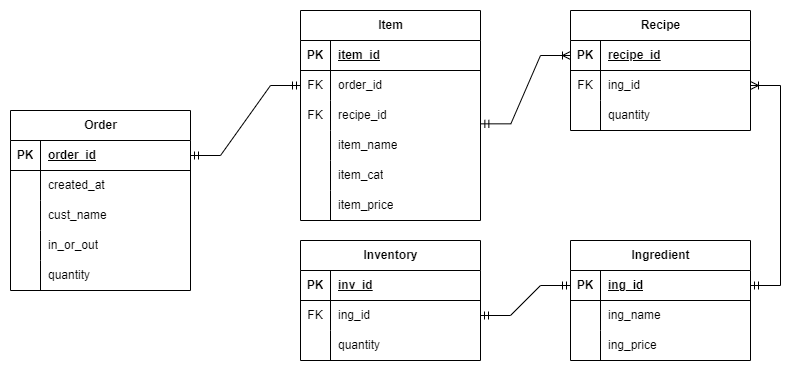

In [15]:
fl.fig_caption("Coffee Shop (ERD) Overview",
               "An overview of the entity-relationship diagram (ERD) illustrating the database structure, including tables such as Orders, Items, Recipes, Ingredients, and Inventory, along with their respective attributes and relationships.")

The displayed ERD follows a database structure for a coffee shop. The model has a total of five tables namely: order, item, inventory, recipe, and ingredient. The order table is the most used entity table as it serves to be the major role in processing customer orders. The following shows each entity relation:

    Order entity is connected to the item entity in a one to one relationship, ideally an order record or the customer order can only have one item detail record to be purchased in a single transaction.

    Item entity is related to the recipe in one and only one to one or many relations, due to the fact that a single item id alone can have several or one recipe.

    Recipe links to the ingredient entity in one or many to one relation, allowing a single ingredient to be in multiple recipes.

    Ingredient entity is connected to inventory in one to one relation to maintain tracking each ingredient’s quantity to the inventory record. 


In [16]:
def validate_inputs_df(df):
    validation_results = []
    for index, row in df.iterrows():
        valid = True
        message = 'Inputs are valid'

        # Define regex rules for each column
        regex_rules = {
            'order_id': r'^ORD\d{3}$',  
            'item_id': r'^It\d{3}$',     
            'inv_id': r'^inv\d{3}$',    
            'ing_id': r'^ING\d{3}$',    
            'quantity': r'^\d+$',       
            'item_price': r'^\d+(\.\d+)?$',  
            'ing_price': r'^\d+(\.\d+)?$',   
            'in_or_out': r'^(in|out)$',
            'recipe_id': r'^[a-zA-Z0-9_-]+$',  
            'cust_name': r'^[a-zA-Z\s]+$',     
            'created_at': r'^\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}$',  
        }

        for col in df.columns:
            if col in regex_rules:
                if not re.match(regex_rules[col], str(row[col])):
                    valid = False
                    message = f"Invalid {col} format"
                    break
        
        validation_results.append((index, valid, message))
    
    return validation_results

In [17]:
fake = Faker()

orders_data = []
for _ in range(100):
    order_id = 'ORD' + str(fake.unique.random_number(digits=3))
    created_at = fake.date_time_between(start_date='-1y', end_date='now').strftime('%Y-%m-%d %H:%M:%S')
    item_id = 'IT' + str(fake.unique.random_number(digits=3))
    quantity = random.randint(1, 10)
    cust_name = fake.name()
    in_or_out = random.choice(['in', 'out'])
    orders_data.append((order_id, created_at, item_id, quantity, cust_name, in_or_out))

items_data = []
for _ in range(50):
    item_id = 'IT' + str(fake.unique.random_number(digits=3))
    recipe_id = fake.unique.word()
    item_name = fake.word().capitalize()
    item_cat = fake.word().capitalize()
    item_size = random.choice(['Small', 'Medium', 'Large'])
    item_price = round(random.uniform(1, 10), 2)
    items_data.append((item_id, recipe_id, item_name, item_cat, item_size, item_price))

ingredients_data = []
for _ in range(20):
    ing_id = 'ING' + str (fake.unique.random_number(digits=3))
    ing_name = fake.word().capitalize()
    ing_weight = random.randint(1, 100)
    ing_meas = random.choice(['g', 'kg', 'ml', 'L'])
    ing_price = round(random.uniform(0.1, 5), 2)
    ingredients_data.append((ing_id, ing_name, ing_weight, ing_meas, ing_price))

inventory_data = []
for _ in range(20):
    inv_id = 'inv' + str (fake.unique.random_number(digits=3))
    ing_id = random.choice([data[0] for data in ingredients_data])
    quantity = random.randint(1, 100)
    inventory_data.append((inv_id, ing_id, quantity))

recipes_data = []
for _ in range(50):
    recipe_id = fake.unique.word()
    ing_id = random.choice([data[0] for data in ingredients_data])
    quantity = random.randint(1, 5)
    recipes_data.append((recipe_id, ing_id, quantity))

In [18]:
validation_results = validate_inputs_df(orders_df)
validation_results

[(0, True, 'Inputs are valid'),
 (1, True, 'Inputs are valid'),
 (2, True, 'Inputs are valid'),
 (3, True, 'Inputs are valid'),
 (4, True, 'Inputs are valid'),
 (5, True, 'Inputs are valid'),
 (6, True, 'Inputs are valid'),
 (7, True, 'Inputs are valid'),
 (8, False, 'Invalid in_or_out format'),
 (9, True, 'Inputs are valid'),
 (10, False, 'Invalid in_or_out format'),
 (11, True, 'Inputs are valid'),
 (12, False, 'Invalid in_or_out format'),
 (13, True, 'Inputs are valid'),
 (14, False, 'Invalid in_or_out format'),
 (15, True, 'Inputs are valid'),
 (16, True, 'Inputs are valid'),
 (17, True, 'Inputs are valid'),
 (18, False, 'Invalid in_or_out format'),
 (19, True, 'Inputs are valid'),
 (20, False, 'Invalid in_or_out format'),
 (21, True, 'Inputs are valid'),
 (22, True, 'Inputs are valid'),
 (23, True, 'Inputs are valid'),
 (24, True, 'Inputs are valid'),
 (25, True, 'Inputs are valid'),
 (26, True, 'Inputs are valid'),
 (27, False, 'Invalid in_or_out format'),
 (28, True, 'Inputs are

In [19]:
validation_results = validate_inputs_df(items_df)
validation_results

[(0, True, 'Inputs are valid'),
 (1, True, 'Inputs are valid'),
 (2, True, 'Inputs are valid'),
 (3, True, 'Inputs are valid'),
 (4, True, 'Inputs are valid'),
 (5, True, 'Inputs are valid'),
 (6, True, 'Inputs are valid'),
 (7, True, 'Inputs are valid'),
 (8, True, 'Inputs are valid'),
 (9, True, 'Inputs are valid'),
 (10, True, 'Inputs are valid'),
 (11, True, 'Inputs are valid'),
 (12, True, 'Inputs are valid'),
 (13, True, 'Inputs are valid'),
 (14, True, 'Inputs are valid'),
 (15, True, 'Inputs are valid'),
 (16, True, 'Inputs are valid'),
 (17, True, 'Inputs are valid'),
 (18, True, 'Inputs are valid'),
 (19, True, 'Inputs are valid'),
 (20, True, 'Inputs are valid'),
 (21, True, 'Inputs are valid'),
 (22, True, 'Inputs are valid'),
 (23, True, 'Inputs are valid')]

In [20]:
validation_results = validate_inputs_df(ingredients_df)
validation_results

[(0, True, 'Inputs are valid'),
 (1, True, 'Inputs are valid'),
 (2, True, 'Inputs are valid'),
 (3, True, 'Inputs are valid'),
 (4, True, 'Inputs are valid'),
 (5, True, 'Inputs are valid'),
 (6, True, 'Inputs are valid'),
 (7, True, 'Inputs are valid'),
 (8, True, 'Inputs are valid'),
 (9, True, 'Inputs are valid'),
 (10, True, 'Inputs are valid'),
 (11, True, 'Inputs are valid'),
 (12, True, 'Inputs are valid'),
 (13, True, 'Inputs are valid'),
 (14, True, 'Inputs are valid'),
 (15, True, 'Inputs are valid'),
 (16, True, 'Inputs are valid'),
 (17, True, 'Inputs are valid')]

In [21]:
validation_results = validate_inputs_df(recipes_df)
validation_results

[(0, True, 'Inputs are valid'),
 (1, True, 'Inputs are valid'),
 (2, True, 'Inputs are valid'),
 (3, True, 'Inputs are valid'),
 (4, True, 'Inputs are valid'),
 (5, True, 'Inputs are valid'),
 (6, True, 'Inputs are valid'),
 (7, True, 'Inputs are valid'),
 (8, True, 'Inputs are valid'),
 (9, True, 'Inputs are valid'),
 (10, True, 'Inputs are valid'),
 (11, True, 'Inputs are valid'),
 (12, True, 'Inputs are valid'),
 (13, True, 'Inputs are valid'),
 (14, True, 'Inputs are valid'),
 (15, True, 'Inputs are valid'),
 (16, True, 'Inputs are valid'),
 (17, True, 'Inputs are valid'),
 (18, True, 'Inputs are valid'),
 (19, True, 'Inputs are valid'),
 (20, True, 'Inputs are valid'),
 (21, True, 'Inputs are valid'),
 (22, True, 'Inputs are valid'),
 (23, True, 'Inputs are valid'),
 (24, True, 'Inputs are valid'),
 (25, True, 'Inputs are valid'),
 (26, True, 'Inputs are valid'),
 (27, True, 'Inputs are valid'),
 (28, True, 'Inputs are valid'),
 (29, True, 'Inputs are valid'),
 (30, True, 'Inputs 

In [22]:
validation_results = validate_inputs_df(inventory_df)
validation_results

[(0, True, 'Inputs are valid'),
 (1, True, 'Inputs are valid'),
 (2, True, 'Inputs are valid'),
 (3, True, 'Inputs are valid'),
 (4, True, 'Inputs are valid'),
 (5, True, 'Inputs are valid'),
 (6, True, 'Inputs are valid'),
 (7, True, 'Inputs are valid'),
 (8, True, 'Inputs are valid'),
 (9, True, 'Inputs are valid'),
 (10, True, 'Inputs are valid'),
 (11, True, 'Inputs are valid'),
 (12, True, 'Inputs are valid'),
 (13, True, 'Inputs are valid'),
 (14, True, 'Inputs are valid'),
 (15, True, 'Inputs are valid'),
 (16, True, 'Inputs are valid'),
 (17, True, 'Inputs are valid')]

In [23]:
conn = sqlite3.connect('coffee_shop.db')
cursor = conn.cursor()

In [24]:
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Orders (
        order_id TEXT PRIMARY KEY,
        item_id TEXT,
        created_at TEXT,
        cust_name TEXT,
        in_or_out TEXT,
        quantity INTEGER,
        FOREIGN KEY (item_id) REFERENCES Items(item_id)
    )
''')

cursor.execute('''
    CREATE TABLE IF NOT EXISTS Items (
        item_id TEXT PRIMARY KEY,
        order_id TEXT,
        recipe_id TEXT,
        item_name TEXT,
        item_cat TEXT,
        item_price REAL,
        FOREIGN KEY (order_id) REFERENCES Orders(order_id)
    )
''')

cursor.execute('''
    CREATE TABLE IF NOT EXISTS Recipes (
        recipe_id TEXT PRIMARY KEY,
        ing_id TEXT,
        quantity INTEGER,
        FOREIGN KEY (ing_id) REFERENCES Ingredients(ing_id)
    )
''')

cursor.execute('''
    CREATE TABLE IF NOT EXISTS Ingredients (
        ing_id TEXT PRIMARY KEY,
        ing_name TEXT,
        ing_price REAL
    )
''')

cursor.execute('''
    CREATE TABLE IF NOT EXISTS Inventory (
        inv_id TEXT PRIMARY KEY,
        ing_id TEXT,
        quantity INTEGER,
        FOREIGN KEY (ing_id) REFERENCES Ingredients(ing_id)
    )
''')

orders_df = pd.read_csv("normalized_orders.csv")
items_df = pd.read_csv("normalized_items.csv")
ingredients_df = pd.read_csv("normalized_ingredients.csv")
inventory_df = pd.read_csv("normalized_inventory.csv")
recipes_df = pd.read_csv("normalized_recipes.csv")

orders_df.to_sql('Orders', conn, if_exists='replace', index=False)
items_df.to_sql('Items', conn, if_exists='replace', index=False)
recipes_df.to_sql('Recipes', conn, if_exists='replace', index=False)
ingredients_df.to_sql('Ingredients', conn, if_exists='replace', index=False)
inventory_df.to_sql('Inventory', conn, if_exists='replace', index=False)

conn.commit()

print("Data successfully ingested into SQLite database.")

Data successfully ingested into SQLite database.


In [25]:
orders_df = pd.read_sql_query("SELECT * FROM Orders", conn)
items_df = pd.read_sql_query("SELECT * FROM Items", conn)
recipes_df = pd.read_sql_query("SELECT * FROM Recipes", conn)
ingredients_df = pd.read_sql_query("SELECT * FROM Ingredients", conn)
inventory_df = pd.read_sql_query("SELECT * FROM Inventory", conn)

In [26]:
fl.table_caption("Orders Data Overview",
                 "This table provides an overview of the orders placed at the coffee shop, including details such as order ID, item ID, creation timestamp, quantity, customer name, and whether the order was for dine-in or takeaway.")

orders_df

,order_id,item_id,created_at,quantity,cust_name,in_or_out
0,ORD001,It008,2024-02-12 07:04:00,1,Alex,out
1,ORD002,It014,2024-02-12 07:09:00,1,Jordan,in
2,ORD003,It008,2024-02-12 07:14:00,1,Taylor,out
3,ORD004,It019,2024-02-12 07:18:00,1,Casey,out
4,ORD005,It024,2024-02-12 07:23:00,1,Jamie,out
...,...,...,...,...,...,...
516,ORD433,It023,2024-02-17 16:11:00,1,Gina,in
517,ORD434,It006,2024-02-17 16:27:00,1,Hugh,out
518,ORD435,It018,2024-02-17 16:43:00,1,Iris,in
519,ORD436,It002,2024-02-17 16:59:00,1,Jack,out


In [27]:
fl.table_caption("Items Detail",
                 "This presents a comprehensive list of items available at the coffee shop, including their IDs, associated recipe IDs, names, categories, sizes, and prices.")

items_df

,item_id,recipe_id,item_name,item_cat,item_size,item_price
0,It001,HDR-CAP-MD,Cappuccino,Hot Drinks,Medium,3.45
1,It002,HDR-CAP-LG,Cappuccino,Hot Drinks,Large,3.75
2,It003,HDR-LAT-MD,Latte,Hot Drinks,Medium,3.45
3,It004,HDR-LAT-LG,Latte,Hot Drinks,Large,3.75
4,It005,HDR-FLT,Flat White,Hot Drinks,None,3.15
5,It006,HDR-CRM-MD,Caramel Macchiato,Hot Drinks,Medium,4.20
6,It007,HDR-CRM-LG,Caramel Macchiato,Hot Drinks,Large,4.60
7,It008,HDR-ESP,Espresso,Hot Drinks,None,2.15
8,It009,HDR-MOC-MD,Mocha,Hot Drinks,Medium,4.00
9,It010,HDR-MOC-LG,Mocha,Hot Drinks,Large,4.60


In [28]:
fl.table_caption("Recipes Overview",
                 "This overview outlines the recipes used for preparing various items at the coffee shop, detailing recipe IDs, ingredient IDs, and quantities required for each recipe.")

recipes_df

,recipe_id,ing_id,quantity
0,HDR-CAP-MD,ING001,8
1,HDR-CAP-MD,ING002,130
2,HDR-CAP-LG,ING001,10
3,HDR-CAP-LG,ING002,180
4,HDR-LAT-MD,ING001,8
...,...,...,...
56,SNK-SHC,ING015,50
57,SNK-SHC,ING003,20
58,SNK-SSM,ING011,1
59,SNK-SSM,ING016,50


In [29]:
fl.table_caption("Ingredients List",
                 "This list presents all the ingredients used in the coffee shop's recipes, featuring ingredient IDs, names, weights/measures, and prices.")

ingredients_df

,ing_id,ing_name,ing_weight,ing_meas,ing_price
0,ING001,Espresso beans,1000,grams,12.00
1,ING002,Whole Milk,1000,ml,1.20
2,ING003,Cheddar,500,grams,7.45
3,ING004,Mozzarella,500,grams,5.00
4,ING005,Whipped cream,300,ml,1.35
5,ING006,Vanilla syrup,1000,ml,14.52
6,ING007,Barista chocolate syrup,1000,ml,8.49
7,ING008,Barista white chocolate syrup,1000,ml,8.49
8,ING009,Barista caramel sauce,1000,ml,8.49
9,ING010,Sugar,1000,grams,1.50


In [30]:
fl.table_caption("Inventory Status",
                 "This table displays the current status of inventory items, including inventory IDs, associated ingredient IDs, and quantities available for each ingredient.")

inventory_df

,inv_id,ing_id,quantity
0,inv001,ING001,4
1,inv002,ING002,55
2,inv003,ING003,1
3,inv004,ING004,4
4,inv005,ING005,7
5,inv006,ING006,3
6,inv007,ING007,3
7,inv008,ING008,4
8,inv009,ING009,1
9,inv010,ING010,4


[ref]: #top
[Back to Table of Contents][ref]

<a name="dat_expl"></a>
## Data Exploration
Utilizes [Pandas](#panda_de) and [SQL](#sql_de) to explore customer ordering patterns, identify popular items, and assess their profitability.
***

For data exploration, customer ordering patterns, item popularity, and profitability were analyzed using both Pandas and SQL. Pandas helps visualize item categories, customer distribution by order type, and top-selling items. SQL generates tables for top items by order count and revenue, tracks average order value over time, monitors inventory status, and examines ingredient price distribution. These insights aid in understanding customer behavior, optimizing inventory, and maximizing revenue.

<a name="panda_de"></a>
### Panda's Data Exploration

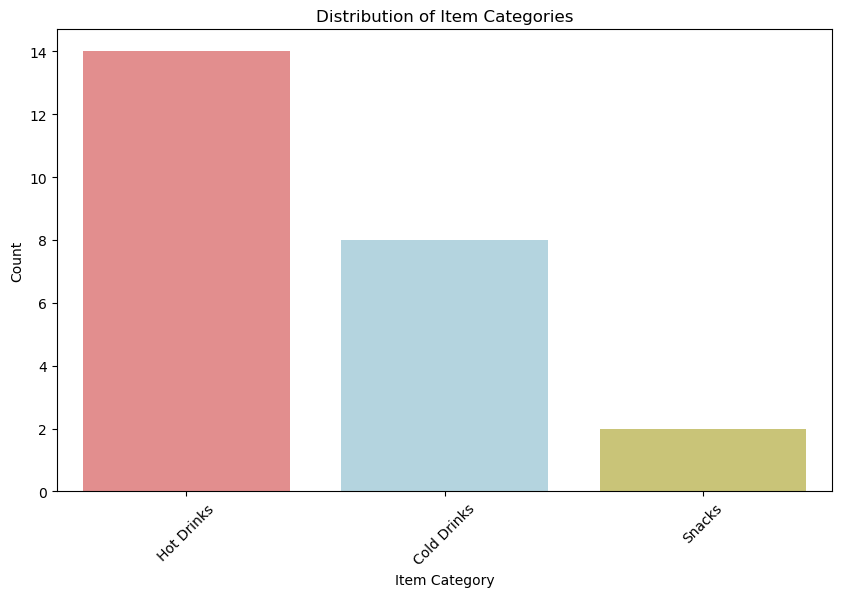

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(data=items_df, x='item_cat', palette={'Hot Drinks': 'lightcoral', 
                                                    'Cold Drinks': 'lightblue', 
                                                    'Snacks': '#D6D06B'}
             )
plt.title('Distribution of Item Categories')
plt.xlabel('Item Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

fl.fig_caption("Distribution of Item Categories",
               "A countplot illustrating the distribution of item categories within the dataset, categorized into 'Hot Drinks', 'Cold Drinks', and 'Snacks', represented by different colors.")

The bar graph depicting the distribution of item categories in the coffee shop's menu shows a strong focus on hot drinks, with 14 unique items, suggesting a primary emphasis on coffee. Cold drinks follow with 8 items, offering a smaller variety of iced beverages, while the snacks category, with just 2 items, indicates a limited selection of food. This distribution points to a menu that centers on beverages, primarily hot drinks, with a modest addition of cold drinks and snacks. Observing the graph, the hot drinks have the highest count suggesting that most customers order hot drinks rather than cold drinks. The snack category has the lowest count implying that customers prefer to buy beverages than food menu items.

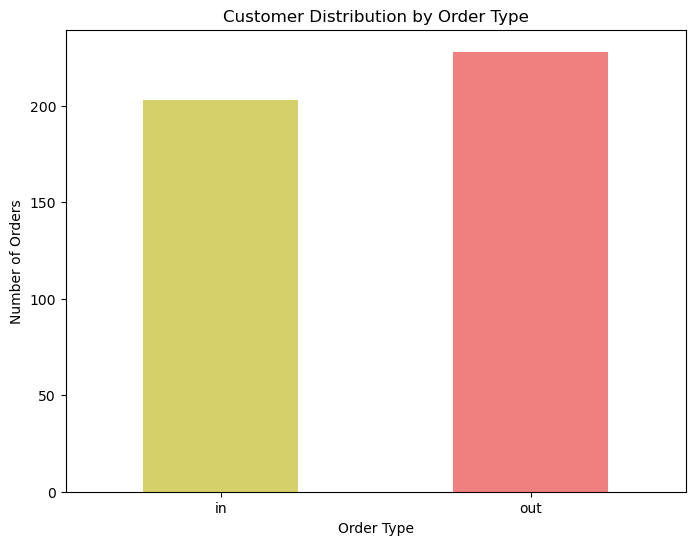

In [32]:
plt.figure(figsize=(8, 6))
order_type_counts = orders_df['in_or_out'].dropna().value_counts()  # Drop null values
order_type_counts = order_type_counts.loc[['in', 'out']]
order_type_counts.plot(kind='bar', color=['#D6D06B', 'lightcoral'])
plt.title('Customer Distribution by Order Type')
plt.xlabel('Order Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.show()

fl.fig_caption("Customer Distribution by Order Type",
               "A bar plot depicting the distribution of orders by type, categorized as dine in (in) and dine out (out), with corresponding counts of orders.")

The bar graph showing customer distribution by order type reveals that "in" orders—those consumed on-site—have a count of 200, indicating a solid base of customers who dine in. Meanwhile, "out" orders—those taken to go—are higher, with approximately 250 orders, suggesting a preference for takeaway options. This implies that customers prefer to have their order taken out because of personal likeness than eating inside the coffee shop. This difference indicates that the coffee shop attracts both sit-down and takeaway customers but leans more towards convenience and mobility. The gap between "in" and "out" orders highlights the importance of enhancing takeaway services while maintaining a welcoming environment for dine-in customers. This distribution helps the coffee shop understand customer behavior and refine its services accordingly.

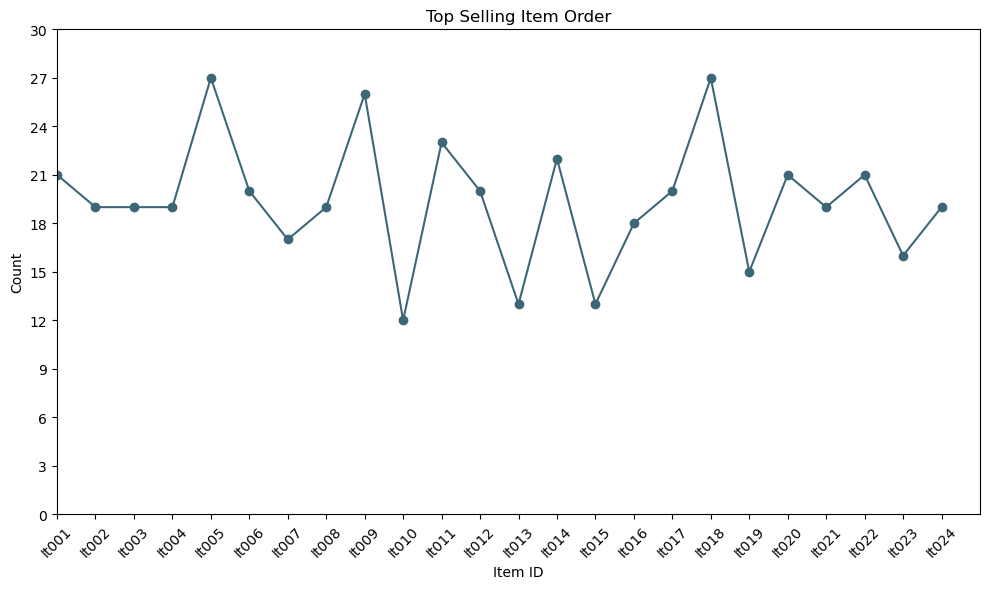

In [33]:
item_count = orders_df['item_id'].value_counts().reindex([f'It{i:03}' for i in range(1, 25)], fill_value=0)

plt.figure(figsize=(10, 6))
plt.plot(item_count.index, item_count.values, marker='o', linestyle='-', color='#3C6776')
plt.title('Top Selling Item Order')
plt.xlabel('Item ID')
plt.ylabel('Count')
plt.xlim(0, 24)
plt.yticks(range(0, 31, 3))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

fl.fig_caption("Top Selling Item Orders",
               "A line plot illustrating the count of orders for the top-selling items, identified by their item IDs, showcasing the distribution of sales.")

The line plot titled "Top Selling Item Order" shows the order count for items labeled from `It001` to `It024`, revealing several trends. The most popular items are `It005` and `It018`, each with 27 counts, indicating high demand among customers. Close behind, `It009` has 26 counts, suggesting another frequently ordered item. A group of items, including `It001`, `It011`, and `It014`, has counts between 21 and 23, indicating they are also favored by customers, albeit to a lesser extent. At the lower end, `It010` has only 12 counts, suggesting it may be less popular or less promoted. Overall, the plot reflects diverse customer preferences, with a few items consistently leading in popularity. This information helps guide the coffee shop in refining its menu and marketing strategies to focus on high-demand items.

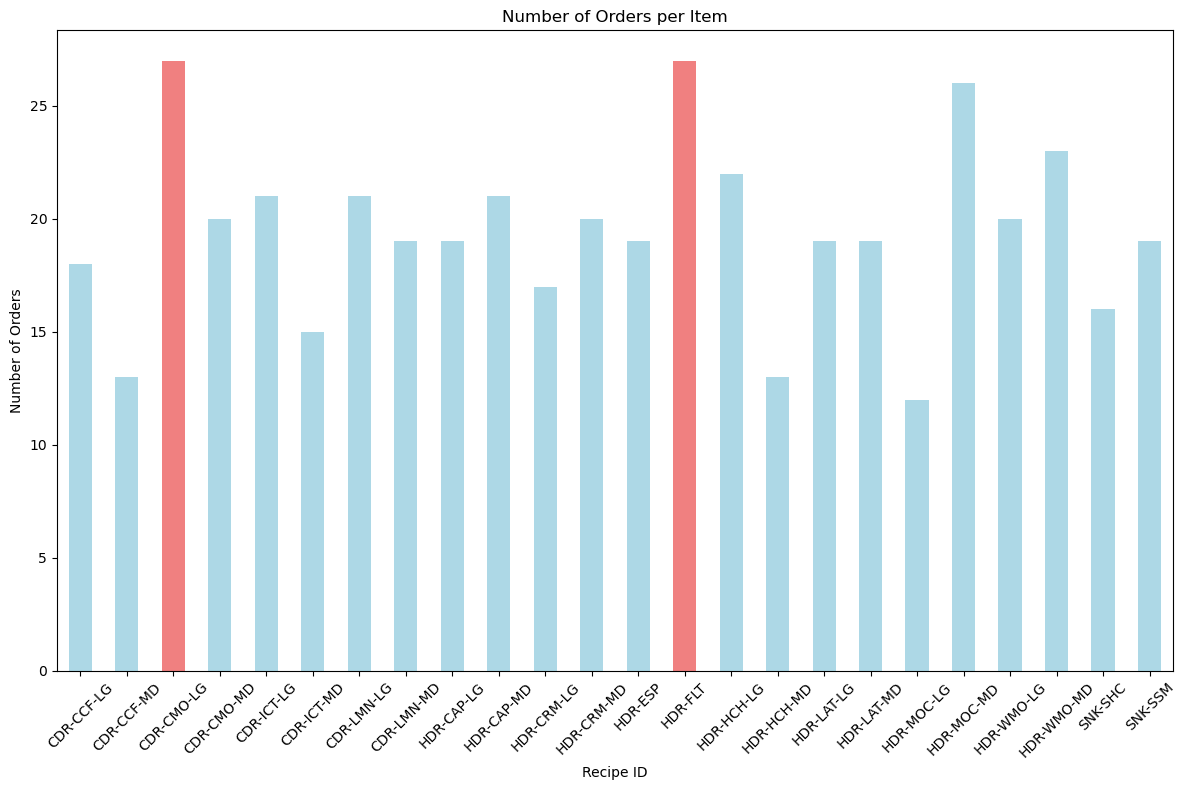

In [34]:
item_order = pd.merge(orders_df, items_df, on='item_id', how='left')
recipe_order_counts = item_order.groupby('recipe_id').size().reset_index(name='count')

max_count = recipe_order_counts['count'].max()
max_count_indices = recipe_order_counts[recipe_order_counts['count'] == max_count].index

# Plotting
plt.figure(figsize=(12, 8))
color = ['lightblue'] * len(recipe_order_counts)
for idx in max_count_indices:
    color[idx] = 'lightcoral'
recipe_order_counts.set_index('recipe_id')['count'].plot(kind='bar', color=color)

plt.title('Number of Orders per Item')
plt.xlabel('Recipe ID')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

fl.fig_caption("Number of Orders per Item",
               "A bar plot showing the number of orders per recipe ID. Recipes with the highest number of orders are highlighted in light coral.")

The bar graph shows which items are most frequently ordered. The top item is `CDR-CMO-LG`, with 27 orders, indicating high popularity among customers. Other frequently ordered items include `HDR-FLT` with 26 orders, `CDR-CMO-MD` with 20 orders, and `HDR-MOC-MD` with 25 orders, suggesting these drinks are customer favorites. Items like `CDR-ICT-LG` and `CDR-LMN-LG` both have 21 orders, confirming strong customer interest. Conversely, items like `HDR-MOC-LG` with 12 orders and `CDR-CCF-MD` with 13 orders are less popular, pointing to areas where the menu could be adjusted or items could be promoted. This graph reveals a mix of high-demand and lower-demand items, providing guidance for menu optimization, marketing, and inventory management to meet customer preferences and drive profitability. 

The two highlighted bars are the highest number of orders by recipe. The CDR-CMO-LG in its item name is cold mocha and HDR-FLT is a flat white hot drink. This suggests that cold mocha and hot flat white is the most popular among customers, since they appear to have the highest number of orders based on their recipe IDs. 

<a name="sql_de"></a>
### SQL's Data Exploration

In [35]:
fl.table_caption("Top 10 Items by Order Count and Revenue",
                 "A table presenting the top 10 items based on both order count and total revenue generated. The table includes the item name with size variations (if applicable), the number of orders, and the total revenue.")

query = """
    SELECT 
        CASE 
            WHEN i.item_size = 'Medium' THEN i.item_name || ' (Medium)'
            WHEN i.item_size = 'Large' THEN i.item_name || ' (Large)'
            ELSE i.item_name 
        END AS item_name_with_size,
        COUNT(o.order_id) AS num_orders, 
        SUM(i.item_price * o.quantity) AS total_revenue
    FROM Orders o
    INNER JOIN Items i ON o.item_id = i.item_id
    GROUP BY item_name_with_size
    ORDER BY num_orders DESC, total_revenue DESC
    LIMIT 10;
"""
top_10_orders = pd.read_sql_query(query, conn)
top_10_orders

,item_name_with_size,num_orders,total_revenue
0,Cold Mocha (Large),27,124.20
1,Flat White,27,85.05
2,Mocha (Medium),26,104.00
3,White Mocha (Medium),23,103.50
4,Hot Chocolate (Large),22,101.20
5,Lemonade (Large),21,78.75
6,Iced Tea (Large),21,74.55
7,Cappuccino (Medium),21,72.45
8,White Mocha (Large),20,94.00
9,Caramel Macchiato (Medium),20,84.00


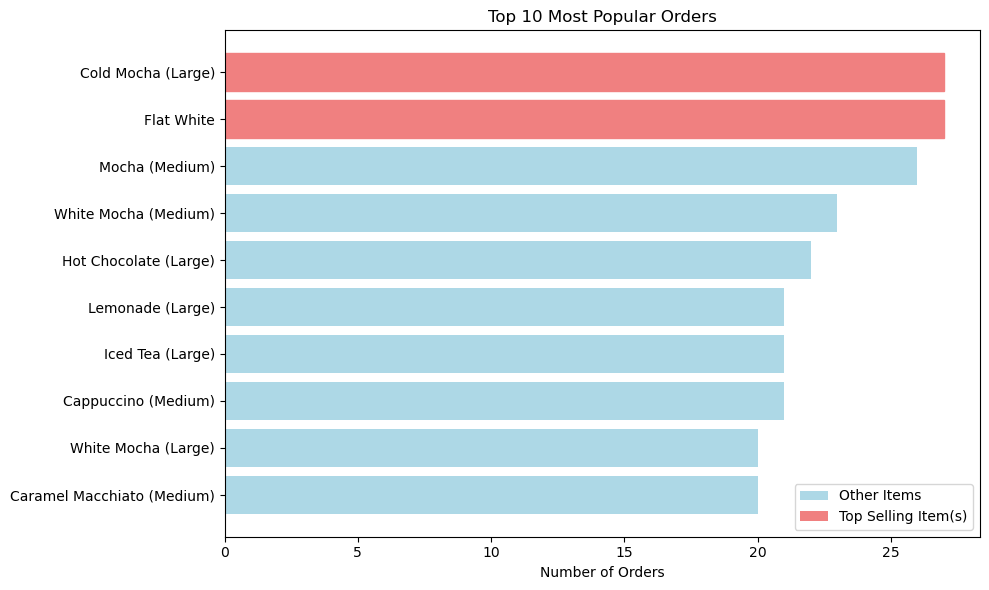

In [36]:
top_selling_items = top_10_orders[top_10_orders['num_orders'] == top_10_orders.iloc[0]['num_orders']]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_orders['item_name_with_size'], 
                top_10_orders['num_orders'], 
                color='lightblue', 
                label='Number of Orders')

for index, bar in enumerate(bars):
    if top_10_orders.iloc[index]['item_name_with_size'] in top_selling_items['item_name_with_size'].tolist():
        bar.set_color('lightcoral')
        
plt.legend(handles=[
    plt.Rectangle((0,0),1,1,fc='lightblue', 
                  edgecolor='none'),
    plt.Rectangle((0,0),1,1,fc='lightcoral', 
                  edgecolor='none')
], labels=['Other Items', 'Top Selling Item(s)'], 
           loc='lower right')

plt.xlabel('Number of Orders')
plt.title('Top 10 Most Popular Orders')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

fl.fig_caption("Top 10 Most Popular Orders",
               "A horizontal bar chart displaying the top 10 most popular orders. The bars represent the number of orders for each item, with the top-selling item(s) highlighted in light coral.")

The panda’s data exploration of the number of orders per item bar graph correlates to the displayed graph showing the top 10 most popular orders under SQL’s data exploration.

The bar graph titled "Top 10 Most Popular Orders" reveals the coffee shop's most frequently ordered items. Tied for the top spot are "Cold Mocha (Large)" and "Flat White," each with 27 orders, indicating that customers favor these drinks. Following closely, "Mocha (Medium)" has 26 orders, and "White Mocha (Medium)" has 23, suggesting a strong preference for both classic and flavored coffee beverages. Non-coffee options like "Hot Chocolate (Large)" and "Lemonade (Large)" also rank high, with 22 and 21 orders respectively, indicating demand for alternative drinks. This mix of popular items reflects a balanced menu and provides insights into customer preferences, helping to guide future menu adjustments and promotions.

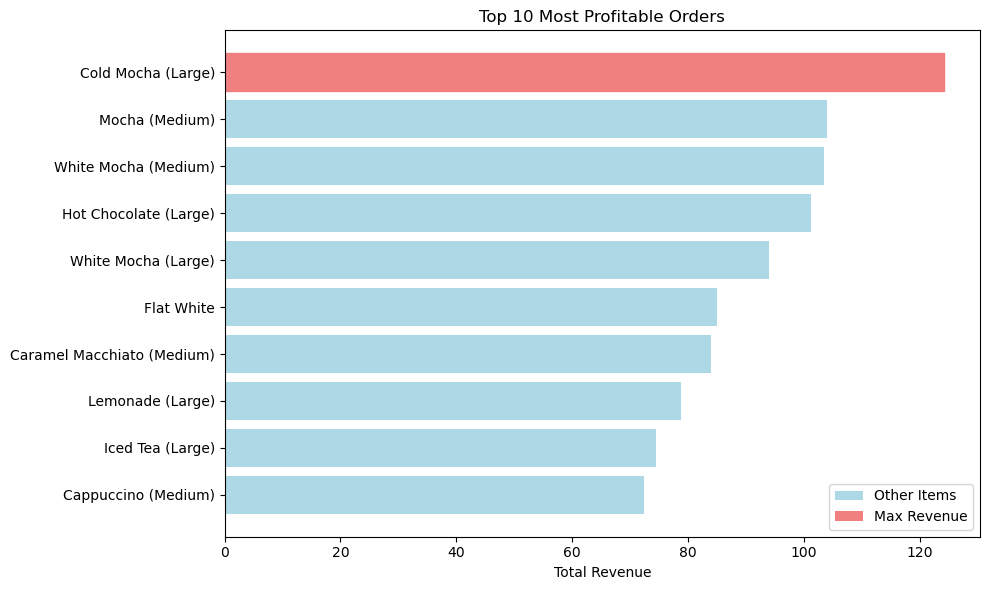

In [37]:
top_10_orders_sorted = top_10_orders.sort_values(by='total_revenue', 
                                                 ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_orders_sorted['item_name_with_size'], 
                top_10_orders_sorted['total_revenue'], 
                color='lightblue', 
                label='Total Revenue')

max_revenue = top_10_orders_sorted['total_revenue'].max()
for bar in bars:
    if bar.get_width() == max_revenue:
        bar.set_color('lightcoral')

plt.legend(handles=[
    plt.Rectangle((0,0),1,1,fc='lightblue', 
                  edgecolor = 'none'),
    plt.Rectangle((0,0),1,1,fc='lightcoral', 
                  edgecolor = 'none')
], 
           labels=['Other Items', 
                   'Max Revenue'], 
           loc='lower right')

plt.xlabel('Total Revenue')
plt.title('Top 10 Most Profitable Orders')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

fl.fig_caption("Top 10 Most Profitable Orders",
               "A horizontal bar chart displaying the top 10 most profitable orders based on total revenue. Each bar represents the total revenue generated by an item, with the item contributing the maximum revenue highlighted in light coral.")

In the graph of the top 10 most popular orders, cold mocha and flat white have gained the highest number of orders. Hence, it is undeniably that one of them has to be the most profitable order. The bar graph titled "Top 10 Most Profitable Orders" reveals the coffee shop's top revenue-generating items. Leading the list is "Cold Mocha (Large)" with a total revenue of 124.20, demonstrating that it's both popular and a key profit driver. Following closely are "Mocha (Medium)" and "White Mocha (Medium)" with 104.00 and 103.50, indicating a strong demand for flavored coffee beverages. Other profitable items include "Hot Chocolate (Large)" with 101.20, showing the appeal of non-coffee drinks, and "Flat White" with 85.05, highlighting the continued demand for traditional coffee. This graph provides valuable insights into which items contribute the most to the coffee shop's revenue. By focusing on these high-revenue items and ensuring consistent quality, the coffee shop can make strategic decisions to optimize the menu, refine pricing strategies, and drive marketing efforts to maintain a strong revenue stream and potentially increase profitability.

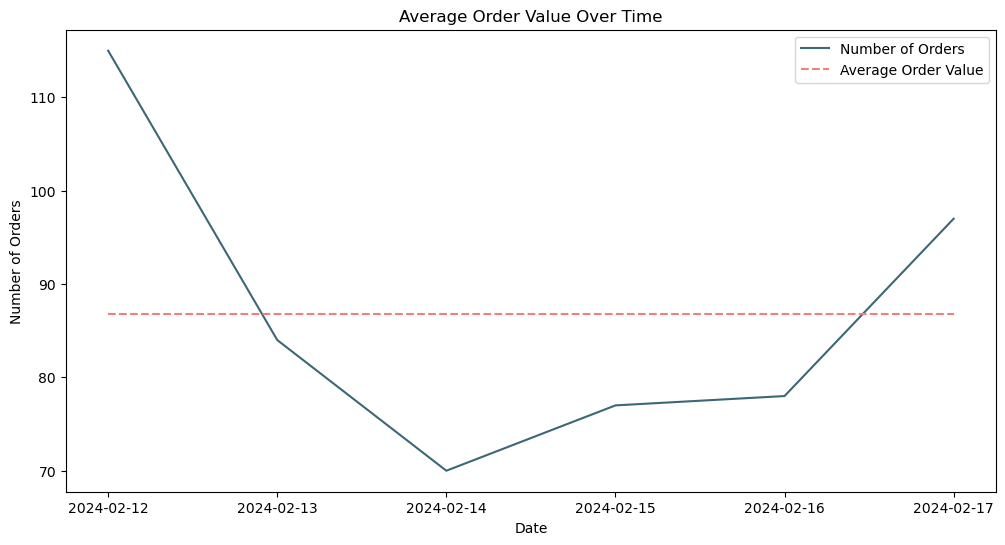

In [38]:
date = """
WITH order_dates AS (
    SELECT 
        DATE(created_at) AS order_date, 
        COUNT(item_id) AS num_orders
    FROM orders
    GROUP BY DATE(created_at)
)
SELECT 
    order_date,
    num_orders,
    AVG(num_orders) OVER () AS avg_order_value
FROM order_dates
ORDER BY order_date;
"""
data = pd.read_sql_query(date, conn)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data['order_date'], data['num_orders'], 
         label='Number of Orders', 
         color='#3C6776') 
plt.plot(data['order_date'], 
         data['avg_order_value'], 
         color='lightcoral', 
         linestyle='--', 
         label='Average Order Value') 
plt.title('Average Order Value Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.legend()
plt.show()

fl.fig_caption("Average Order Value Over Time",
               "A line plot illustrating the average order value over time, with the number of orders on the primary y-axis and the average order value on the secondary y-axis, represented by dashed lines.")

The line graph shows fluctuations in the coffee shop's daily order volume. The overall average is 88 orders, but the trend has noticeable peaks and troughs. On 2024-02-12, the graph reaches over 110 orders, likely due to an event or promotion, but drops to 84 on 2024-02-13. The downward trend continues to 70 orders on 2024-02-14, indicating reduced customer activity. The order volume begins to rebound, with counts rising to 77 on 2024-02-15, then to 78 on 2024-02-16. By 2024-02-17, there's a resurgence to 97 orders, suggesting a recovery in customer demand, possibly due to a weekend effect. These fluctuations indicate that the coffee shop should adjust staffing and inventory to match changing demand and investigate what causes these shifts to better manage resources.

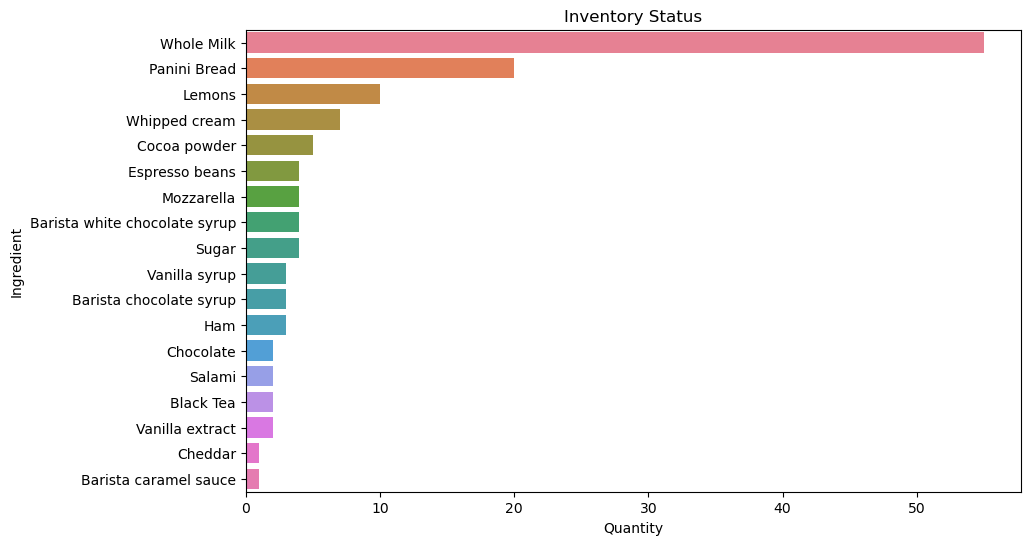

In [39]:
inv = """
SELECT 
    i.ing_name AS ingredient,
    inv.quantity AS quantity
FROM inventory inv
INNER JOIN ingredients i ON inv.ing_id = i.ing_id
ORDER BY quantity DESC;
"""
inventory_data = pd.read_sql_query(inv, conn)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='quantity', 
            y='ingredient', 
            data=inventory_data, 
            palette='husl')
plt.title('Inventory Status')
plt.xlabel('Quantity')
plt.ylabel('Ingredient')
plt.show()

fl.fig_caption("Inventory Status",
               "A bar plot illustrating the current inventory status of ingredients, with the quantity of each ingredient displayed on the x-axis and the ingredient names on the y-axis.")

The bar graph provides an overview of the current stock levels for various ingredients in the coffee shop. Whole milk is the most abundant, with about 60 units, indicating its central role in many drinks. This means that there are a lot of menu items that need a whole milk. For instance, hot or cold coffee drinks that must have milk as a recipe. Panini bread, with 20 units, has a moderate stock, suggesting regular but not high usage. Lemons, whipped cream, and cocoa powder follow with 11, 8, and 6 units, respectively, showing they are used but less frequently. Essential ingredients like espresso beans, mozzarella, white chocolate syrup, and sugar each have 4 units, suggesting a steady but not excessive demand. Smaller stocks of 3 units, like vanilla syrup and barista chocolate syrup, imply occasional use. The graph also indicates low-stock items such as cheddar and barista caramel sauce, each with just 1 unit, signaling a need for restocking. This snapshot of inventory highlights the varying demand for different ingredients and points to areas requiring inventory management to prevent shortages.

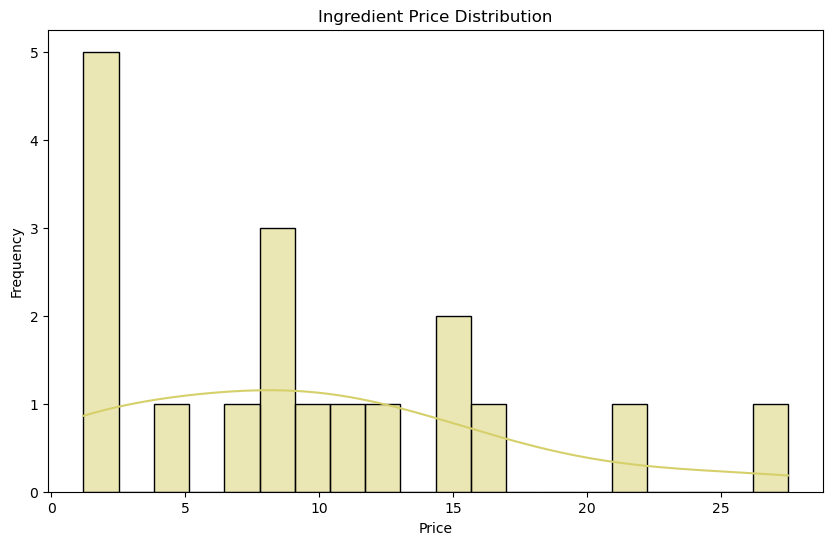

In [40]:
ing = """
    SELECT ing_price
    FROM Ingredients;
"""

ingredient_prices = pd.read_sql_query(ing, conn)

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(ingredient_prices['ing_price'], 
             bins=20, 
             kde=True, 
             color='#D6D06B')
plt.title('Ingredient Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

fl.fig_caption("Ingredient Price Distribution",
               "A histogram displaying the distribution of ingredient prices, showing the frequency of different price ranges.")

The ingredient price distribution graph shows a varied spread of costs for the coffee shop's ingredients. The most common price range is 1-2, with a frequency of 5, suggesting that most ingredients are relatively low-cost, indicating a focus on cost-effective inventory. In the mid-range, the 8-9 price range has a frequency of 3, while 4-5, 7-8, 9-10, 10-11, and 11-12 each have a frequency of 1, showing a range of moderately priced ingredients. In the higher-cost range, smaller frequencies are observed, with the 14-16 and 16-17 ranges each having 2 occurrences, indicating occasional use of pricier ingredients. The high-end price brackets of 21-22 and 26-27 have one occurrence each, representing premium ingredients used in specialty items. This distribution suggests that while the coffee shop generally relies on cost-effective ingredients, it also includes some high-end items, requiring careful cost management and pricing strategies.

[ref]: #top
[Back to Table of Contents][ref]

<a name="res_dis"></a>
## Results and Discussions
This presents key findings regarding the most popular order and its associated profitable item, along with discussions on their implications for menu optimization and business growth.
***

**Distribution of Item Categories:** The bar graph representing the distribution of item categories shows a clear preference for hot drinks, which have the highest count with 14 unique items. This suggests that the coffee shop's menu focuses primarily on hot beverages, likely catering to customers who enjoy coffee, tea, or similar drinks. Cold drinks, with 8 unique items, are the second most prevalent category, indicating a smaller but significant offering that could include iced coffees, smoothies, or other chilled beverages. Lastly, the snacks category has only 2 unique items, indicating a limited selection of food or light bites to complement the drinks. This distribution implies that the coffee shop's primary focus is on beverages, particularly hot drinks, with a smaller emphasis on cold drinks and snacks. Understanding this distribution helps in analyzing customer preferences and evaluating the balance of the menu to meet diverse tastes and needs.

**Customer Distribution by Order Type:** The bar graph representing customer distribution by order type reveals a significant pattern in the way customers interact with the coffee shop. The "in" orders, which likely refer to customers who consume their orders within the premises, have a count of 200. This indicates a substantial number of customers choosing to dine in, suggesting a welcoming environment that encourages people to stay and enjoy their coffee or food on-site. The "out" orders, representing those who take their orders to go, have an even higher count, with approximately 250 orders. This higher number of "out" orders could indicate a trend toward convenience and mobility, with customers preferring to grab their coffee or snacks and leave, perhaps due to busy schedules or other factors. The discrepancy between "in" and "out" orders may suggest an opportunity for the coffee shop to enhance its takeaway services or adjust its in-house offerings to balance customer needs. Overall, this graph provides insights into customer behavior and can help inform operational decisions to improve the coffee shop's service and customer satisfaction.

**Top Selling Item Order:** The line plot titled "Top Selling Item Order" depicts the count of orders for various items, labeled from `It001` to `It024`. The plot reveals several key patterns. Notably, `It005` and `It018` are the top-selling items, each with 27 counts, indicating these items are popular among customers. Close behind is `It009` with 26 counts, suggesting another high-demand item. Several items, including `It001`, `It011`, and `It014`, have counts ranging from 21 to 23, indicating they are also relatively popular but not at the same level as the top three. On the lower end, `It010` has the fewest counts, with just 12, suggesting it might be less appealing or less promoted compared to other items. Overall, the plot suggests a diversity of customer preferences, with certain items consistently leading in popularity, providing valuable insights for optimizing the coffee shop's menu and marketing strategies.

**Number of Orders per Item:** The bar graph showing the "Number of Orders per Item" provides insights into which items are ordered most frequently. The item with the highest number of orders is `CDR-CMO-LG` with 27 orders, indicating it is one of the most popular choices among customers. Other high-performing items include `HDR-FLT` with 26 orders, `CDR-CMO-MD` with 20 orders, and `HDR-MOC-MD` with 25 orders, suggesting these drinks are customer favorites. Items like `CDR-ICT-LG` and `CDR-LMN-LG`, both with 21 orders, also show strong customer interest. On the other hand, items like `HDR-MOC-LG` with 12 orders and `CDR-CCF-MD` with 13 orders have relatively lower demand, hinting at possible areas for menu adjustments or additional promotion. The data reveals a mix of popular and less popular items, providing a roadmap for menu optimization, targeted marketing, and inventory management. By focusing on high-demand items and exploring reasons for lower demand, the coffee shop can enhance its offerings to meet customer preferences and drive profitability.

**Top 10 Most Popular Orders:** The bar graph titled "Top 10 Most Popular Orders" highlights the coffee shop's most frequently ordered items, demonstrating customer preferences. Tied for first place with 27 orders each are "Cold Mocha (Large)" and "Flat White," indicating these drinks are among the shop's bestsellers, suggesting customers have a strong preference for these specific types of coffee. Following closely, "Mocha (Medium)" has 26 orders, while "White Mocha (Medium)" is next with 23 orders. 

The popularity of these specific drinks might reflect customer tastes for traditional coffee drinks with a twist, as well as a balance of hot and cold options. Further down the list, items like "Hot Chocolate (Large)" and "Lemonade (Large)"—with 22 and 21 orders, respectively—show the appeal of non-coffee drinks. This balance suggests that while coffee-based beverages dominate, there's a notable demand for alternative drinks. Overall, this graph indicates a range of popular menu items that can inform future promotions and menu adjustments to align with customer trends.

**Top 10 Most Profitable Orders:** The bar graph titled "Top 10 Most Profitable Orders" reveals the items generating the highest revenue for the coffee shop. Leading the list is "Cold Mocha (Large)" with a total revenue of 124.20, indicating that not only is it popular among customers, but it also contributes significantly to the shop's profits. Following closely, "Mocha (Medium)" and "White Mocha (Medium)" earn 104.00 and 103.50, respectively, showing a high demand for flavored coffee beverages.

Further down, "Hot Chocolate (Large)" generates 101.20, which might indicate a broader appeal for non-coffee beverages, contributing to overall revenue. The list also includes items like "Flat White" (85.05) and "Caramel Macchiato (Medium)" (84.00), suggesting that traditional coffee beverages are both popular and profitable. This graph provides valuable insights into which items drive the most revenue, helping to guide strategic decisions around menu focus, pricing strategies, and marketing. By promoting these profitable items and ensuring consistent quality, the coffee shop can maintain a strong revenue stream and potentially increase overall profitability.

**Average Order Value Over Time:** The line graph illustrating "Average Order Value Over Time" reveals fluctuations in the coffee shop's daily order volume across a specific period. With an overall average of 88 orders, the trend exhibits significant peaks and troughs. On 2024-02-12, the graph hits a high point with over 110 orders, possibly due to a special event or promotion, followed by a noticeable drop to 84 on 2024-02-13. This downward trend continues to a low of 70 on 2024-02-14, indicating a decrease in customer activity. However, the order volume begins to rebound, with counts rising to 77 on 2024-02-15 and 78 on 2024-02-16. By 2024-02-17, there's a resurgence to 97 orders, suggesting a recovery in customer demand, potentially due to the weekend or another contributing factor. These fluctuations suggest the need for the coffee shop to adapt its staffing and inventory management to accommodate varying levels of customer activity and to investigate the underlying causes for these trends.

**Inventory Status:** The bar graph depicting "Inventory Status" offers a snapshot of the current stock levels for various ingredients and products in the coffee shop. Whole milk is by far the most abundant, with approximately 60 units, indicating it's a key ingredient for many drinks and dishes. Panini bread has a moderate stock level with 20 units, suggesting regular but not high usage, possibly for sandwiches. Lemons, whipped cream, and cocoa powder follow, with 11, 8, and 6 units respectively, showing they are less commonly used but still significant in various recipes. Espresso beans, mozzarella, white chocolate syrup, and sugar each have 4 units, indicating they are necessary but not in excessive demand. Other items like vanilla syrup, barista chocolate syrup, and ham have a smaller stock of 3 units, indicating occasional use. The graph also points to items that are low in stock, such as cheddar and barista caramel sauce, each with just 1 unit, highlighting the need for restocking. This distribution reflects the varying degrees of demand for different ingredients and suggests which items might require inventory management or restocking to avoid shortages.

**Ingredient Price Distribution:** The ingredient price distribution graph shows a varied frequency of ingredient costs in the coffee shop. The most common price range is 1-2, with a frequency of 5, indicating that the majority of ingredients are relatively low-cost, suggesting that the coffee shop focuses on maintaining cost-effective inventory. Beyond this range, there is a notable distribution in the mid-range prices: the 8-9 price range has a frequency of 3, suggesting a concentration of moderately priced ingredients, while the 4-5, 7-8, 9-10, 10-11, and 11-12 ranges each have a frequency of 1, reflecting a wider variety of ingredient costs in the middle range. In the higher-cost category, there are smaller frequencies, with the 14-16 and 16-17 ranges each having a frequency of 2, indicating occasional use of pricier ingredients. Finally, the 21-22 and 26-27 price ranges have one occurrence each, representing the high-end ingredients used in the coffee shop's menu. This distribution suggests that while the bulk of the coffee shop's inventory consists of cost-effective ingredients, it also features a few premium ingredients that may be key to specialty items or unique recipes, requiring careful cost management and pricing strategies.

[ref]: #top
[Back to Table of Contents][ref]

<a name="conc"></a>
## Conclusion and Recommendations
This summarizes conclusions drawn from the analysis and provides actionable recommendations for improving the menu order list and maximizing the coffee shop's progress.
***

The analysis of ASND's coffee shop data indicates that while hot beverages dominate the menu with 14 unique items, the most popular and profitable drink is the "Cold Mocha (Large)", highlighting a significant customer preference for cold drinks. Despite a strong focus on hot beverages, "Cold Mocha (Large)" consistently tops the popularity charts due to its unique flavor profile, which combines espresso with cold milk and chocolate syrup, offering a refreshing alternative to traditional hot drinks. Additionally, the large size of the Cold Mocha contributes to its profitability, as it generates a higher revenue per order while maintaining relatively low ingredient costs.

The data also shows a higher frequency of "out" orders, with 250 takeaway orders compared to 200 dine-in orders. This trend toward takeaway services could be attributed to changing customer lifestyles, with more people seeking convenience and quick service. To capitalize on this trend, ASND should streamline its takeaway services by implementing mobile ordering, improving packaging quality, and creating a dedicated pickup area to reduce wait times.

To build on the popularity and profitability of the Cold Mocha, ASND can launch targeted social media campaigns that emphasize its unique taste and convenience, using high-quality visuals and customer testimonials to attract more customers. Offering combo deals with Cold Mocha and other popular items, such as snacks or desserts, can encourage larger purchases and increase the average order value. A loyalty program that rewards customers for repeat purchases of Cold Mocha can further boost sales and encourage customer loyalty.

In terms of inventory management, ASND should focus on maintaining adequate stock levels for high-demand ingredients while avoiding overstocking. Regular stock checks and strong supplier relationships are crucial to ensuring a consistent supply of key ingredients. The coffee shop should also consider introducing seasonal variations of popular drinks to keep the menu fresh and attract repeat customers, while managing inventory more efficiently.

By implementing these strategies, ASND can leverage the success of Cold Mocha and other popular drinks to drive business growth, increase customer satisfaction, and maintain a competitive edge in the coffee shop market.

[ref]: #top
[Back to Table of Contents][ref]

<a name="refe"></a>
## References
In this section, details about the dataset utilized for the analysis were provided.
***

*Mtvchk, V. (2024, March 27). Coffee Shop Sales/Inventory/Staff☕️. Kaggle. https://www.kaggle.com/datasets/viramatv/coffee-shop-data*

[ref]: #top
[Back to Table of Contents][ref]

***
***